Método Bisseção 

A raíz foi achada depois de 24 iterações.
All approximations: [-10, 10, 0.0, 5.0, 2.5, 1.25, 1.875, 1.5625, 1.71875, 1.640625, 1.6015625, 1.58203125, 1.591796875, 1.5869140625, 1.58935546875, 1.588134765625, 1.5875244140625, 1.58721923828125, 1.587371826171875, 1.5874481201171875, 1.5874099731445312, 1.5873908996582031, 1.5874004364013672, 1.5874052047729492, 1.5874028205871582, 1.5874016284942627]
A raíz aproximada é: 1.5874016284942627


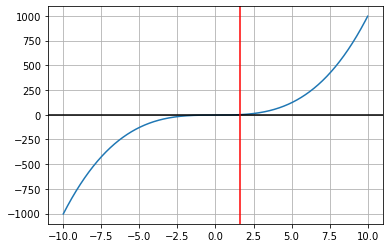

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def bisection_method(func, a, b, tol=1e-6, max_iter=100):
    iter_count = 0
    all_x = [a, b]
    
    while (b-a) / 2 > tol and iter_count < max_iter:
        x = (a + b) / 2
        f_x = func(x)
        f_a = func(a)
        #Bolzano
        if f_x * f_a > 0:               
            a = x
        else:
            b = x
        
        all_x.append(x)
        iter_count += 1
    
    if (b-a) / 2 <= tol:
        print(f"A raíz foi achada depois de {iter_count} iterações.")
        print(f"All approximations: {all_x}")
        return x
    else:
        print(f"O método falhou depois de {max_iter} iterações.")
        print(f"Todas as aproximações: {all_x}")
        return None

def user_function(x):
    return x**3 - 4

root = bisection_method(user_function, -10, 10)
print(f"A raíz aproximada é: {root}")

x = np.linspace(-10, 10, 1000)
y = user_function(x)

plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=root, color='r')
plt.grid(True)
plt.show()

Falsa Posição 

A raíz foi achada depois de 8 iterações.
A raíz aproximada é: 1.640625


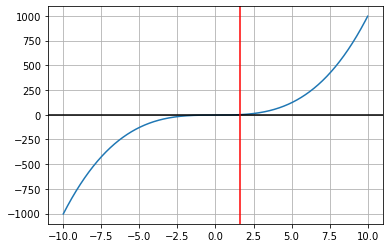

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def fake_position_method(func, a, b, tol=1e-1, max_iter=100):
    if func(a) * func(b) >= 0:
        raise ValueError("A função deve ter sinais opostos nas extremidades do intervalo.") #Bolzano
    
    iter_count = 0
    error = 1
    
    while error > tol and iter_count < max_iter:
        c = (a + b) / 2
        error = abs(c - b)
        
        if func(c) == 0:
            break
        
        if func(c) * func(a) < 0:
            b = c
        else:
            a = c
        
        iter_count += 1
    
    if error <= tol:
        print(f"A raíz foi achada depois de {iter_count} iterações.")
        return c
    else:
        print(f"O método falhou depois de {max_iter} iterações.")
        return None

def user_function(x):
    return x**3 - 4

root = fake_position_method(user_function, -10, 10)
print(f"A raíz aproximada é: {root}")

x = np.linspace(-10, 10, 1000)
y = user_function(x)

plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=root, color='r')
plt.grid(True)
plt.show()

Interativo Linear (MIL) 

A raíz foi achada depois de 6 iterações.
All approximations: [1, 2.0, 1.3333333333333333, 1.740740740740741, 1.496638745391044, 1.6408814509056477, 1.5559555362102993]
A raíz aproximada é: 1.5559555362102993


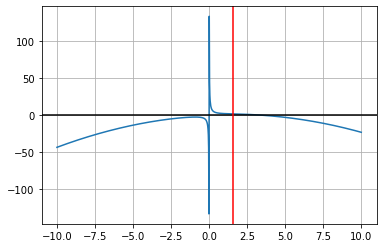

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def fixed_point_method(func, x0, tol=1e-1, max_iter=100):
    iter_count = 0
    error = 1
    all_x = [x0]
    
    while error > tol and iter_count < max_iter:
        x = func(x0)
        error = abs(x - x0)
        x0 = x
        all_x.append(x0)
        iter_count += 1
    
    if error <= tol:
        print(f"A raíz foi achada depois de {iter_count} iterações.")
        print(f"All approximations: {all_x}")
        return x0
    else:
        print(f"O método falhou depois de {max_iter} iterações.")
        print(f"Todas as aproximações: {all_x}")
        return None

def user_function(x):
    return 1/3 * (3 * x - (x**3 - 4) / x)

root = fixed_point_method(user_function, 1)
print(f"A raíz aproximada é: {root}")

x = np.linspace(-10, 10, 1000)
y = user_function(x)

plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=root, color='r')
plt.grid(True)
plt.show()

Newton-Raphson

Iteração	 Ponto(x1)	 |G(x1)|
1		 0.33330300	 0.03729989
2		 0.33760730	 0.00001430
3		 0.33760896	 0.00000000

A raiz aproximada da função é: 0.33760896


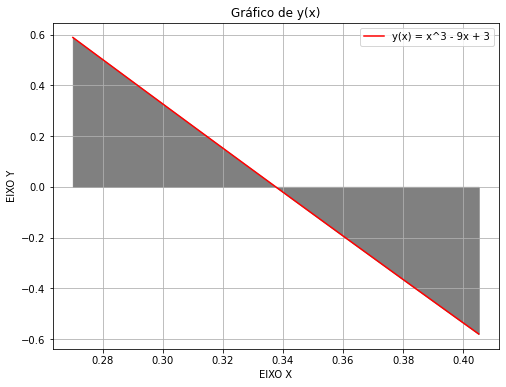

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**3 - 9*x + 3 # função que se deseja calcular o zero

def Newton_Raphson(f, x0=0.5):
    erro = 0.0000001
    maxint = 100
    var_count = 1

    def dydx(x):
        h = 0.001
        derivative = (f(x + h) - f(x)) / h # derivada numérica da função (não precisa mexer)
        return derivative

    # Método Numérico de Newton
    if abs(f(x0)) < erro:
        print("\nA raiz aproximada da função é: %.8f" % (x0))
    else:
        print("Iteração\t Ponto(x1)\t |G(x1)|")
        while var_count < maxint and abs(f(x0)) > erro:
            x1 = x0 - (f(x0) / dydx(x0))
            print("%d\t\t %.8f\t %.8f" % (var_count, x1, abs(f(x1))))
            x0 = x1
            var_count += 1

        if var_count > maxint:
            print("\nERRO: Número Máximo de Iterações Atingido!")
        else:
            print("\nA raiz aproximada da função é: %.8f" % (x0))

    # Plotagem do Gráfico de G(x)
    xt = np.linspace(0.80 * x0, 1.20 * x0)

    plt.figure(figsize=(8, 6))
    plt.title('Gráfico de y(x)')
    plt.xlabel('EIXO X')
    plt.ylabel('EIXO Y')
    plt.plot(xt, func(xt), color="red", label="y(x) = x^3 - 9x + 3")
    plt.fill_between(xt, func(xt), color="gray")
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Exemplo de uso
x0 = 0.5
Newton_Raphson(func, x0)